# Task 5 - Clustering Models
1. Perform K-Means clustering on a customer segmentation dataset (e.g., Mall Customers).

2. Determine the optimal number of clusters using the Elbow method/Silhoutte Score.

3. Visualize the clusters and interpret them.

4. Apply Hierarchical clustering on the same dataset.

5. Plot the dendrogram and explain how to choose the number of clusters.

6. Compare results from K-Means and Hierarchical clustering. Which gives more interpretable clusters?

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [29]:
# Load dataset
df = pd.read_csv("Mall_Customers.csv")
print("Shape:", df.shape)
print(df.head())

Shape: (200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [30]:
print("Null values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

# Convert Gender to numeric
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

print(df.head())


Null values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Duplicate rows: 0
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       0   20                  16                       6
3           4       0   23                  16                      77
4           5       0   31                  17                      40


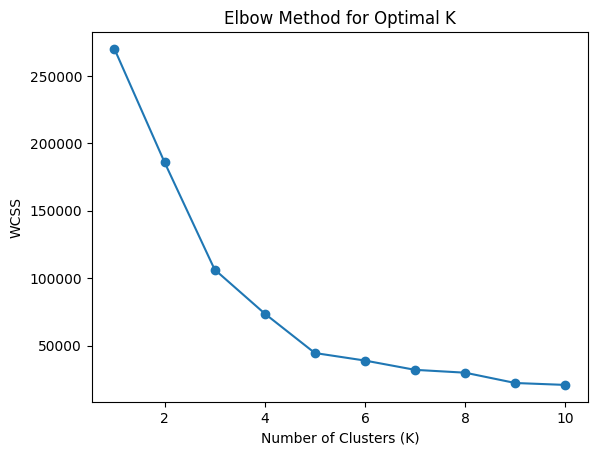

In [36]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

wcss = [] 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# here we are unable to locatet the optimal number of clusetrs is it 4,5,6 which one we are not sure so we will use the silhutte me thos to identify

K=2, Silhouette Score=0.385
K=3, Silhouette Score=0.468
K=4, Silhouette Score=0.493
K=5, Silhouette Score=0.554
K=6, Silhouette Score=0.457
K=7, Silhouette Score=0.455
K=8, Silhouette Score=0.461
K=9, Silhouette Score=0.458
K=10, Silhouette Score=0.422


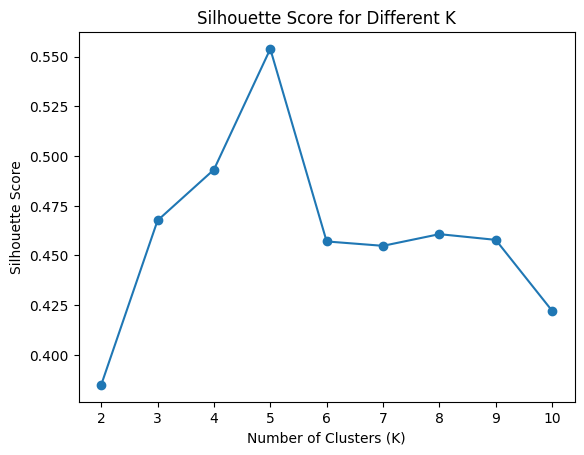

In [37]:
sil_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    sil = silhouette_score(X, labels)
    sil_scores.append(sil)
    print(f"K={k}, Silhouette Score={sil:.3f}")

plt.plot(K, sil_scores, marker='o')
plt.title('Silhouette Score for Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()


In [ ]:
# so we will select 5 as optimal number of clusters

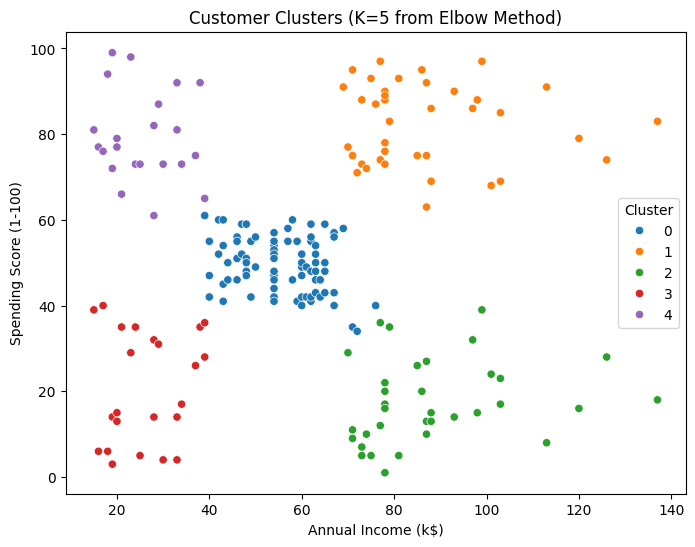

In [40]:
kmeans_5 = KMeans(n_clusters=5, random_state=0)
y_kmeans = kmeans_5.fit_predict(X)

# Add cluster labels to data
df['Cluster'] = y_kmeans

# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='tab10', data=df)
plt.title('Customer Clusters (K=5 from Elbow Method)')
plt.show()


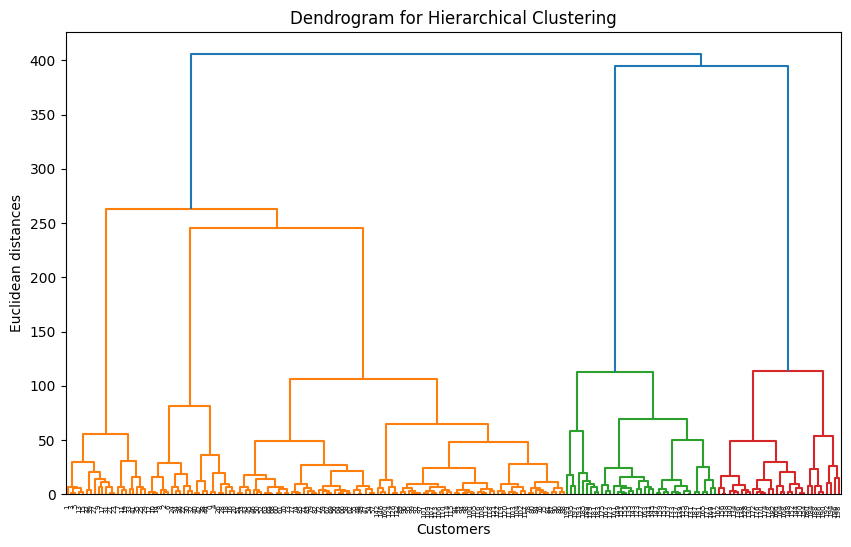

In [41]:
# Perform hierarchical clustering
linked = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


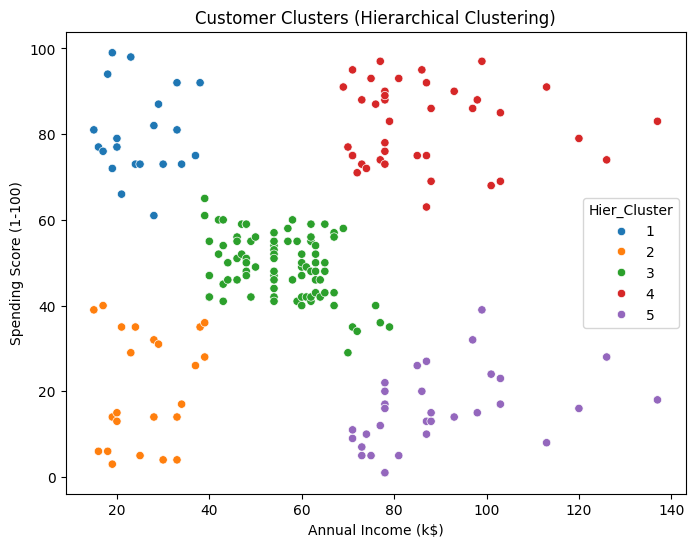

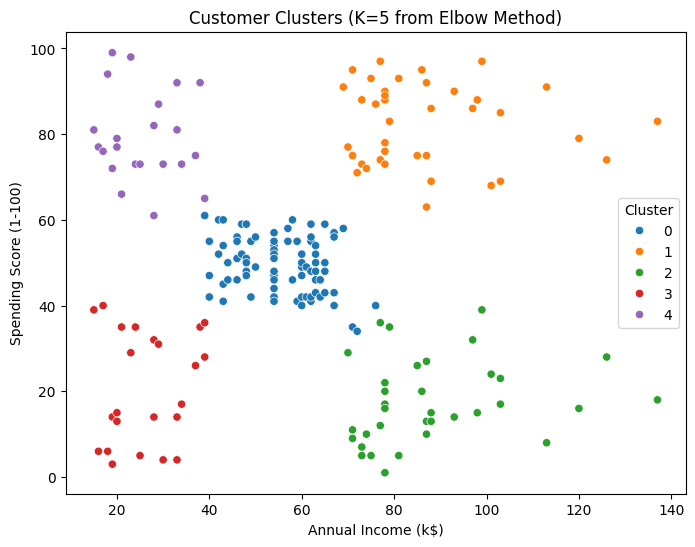

In [45]:
# Choose number of clusters based on dendrogram (example: 5)
clusters_hier = fcluster(linked, 5, criterion='maxclust')

# Add cluster column to dataframe for plotting
df['Hier_Cluster'] = clusters_hier

plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', 
                y='Spending Score (1-100)', 
                hue='Hier_Cluster', 
                palette='tab10', 
                data=df)
plt.title('Customer Clusters (Hierarchical Clustering)')
plt.show()


kmeans_5 = KMeans(n_clusters=5, random_state=0)
y_kmeans = kmeans_5.fit_predict(X)

# Add cluster labels to data
df['Cluster'] = y_kmeans

# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='tab10', data=df)
plt.title('Customer Clusters (K=5 from Elbow Method)')
plt.show()


# observations
- With Elbow we were not sure with optimal number of cluster but with Silhouette methods we choose 5 clusters as optimal.
- the hierarchical method gives us interpretation and also when plotted gives clear border for each clusete 
- for k means the boundaries are little blur and some group got divided and interpretetion is less compared to hierarchical.
